In [1]:
!pip install opencv-python-headless

Saving wp5975242.png to wp5975242.png


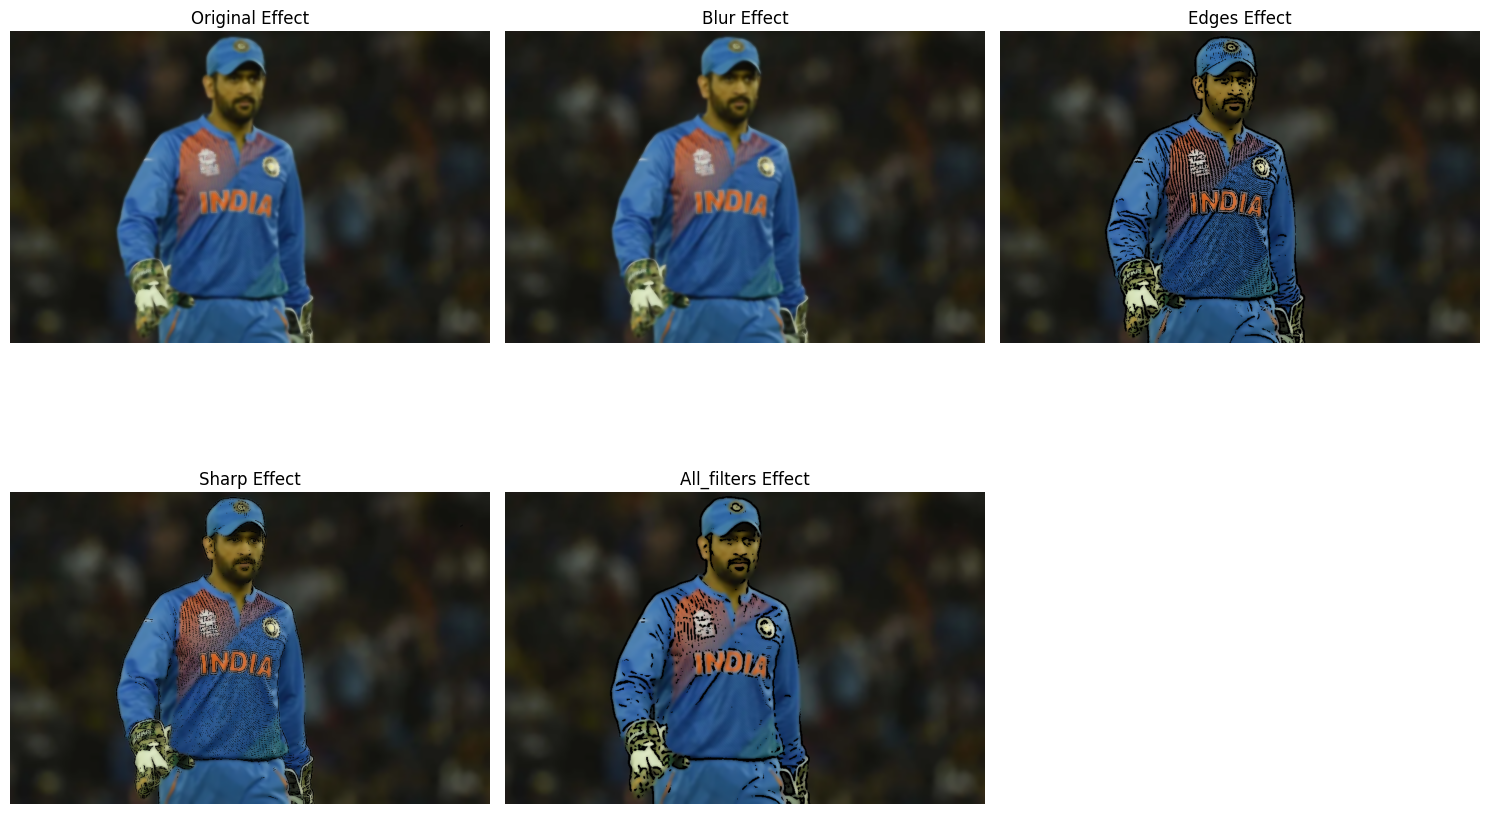

In [2]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Function to apply different filters to the image
def apply_filter(image, filter_type):
    if filter_type == 'blur':
        return cv2.medianBlur(image, 5)
    elif filter_type == 'edges':
        gray_scale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        return cv2.adaptiveThreshold(gray_scale, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 9)
    elif filter_type == 'sharp':
        return cv2.filter2D(image, -1, np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]]))
    else:
        return image

# Function to create cartoon-style image using selected filters
def cartoonify_image(image, filters=['blur', 'edges']):
    filtered_image = image.copy()
    for filter_type in filters:
        filtered_image = apply_filter(filtered_image, filter_type)

    color_image = cv2.bilateralFilter(image, 9, 300, 300)

    # Ensure that the filtered_image always has 3 channels
    if len(filtered_image.shape) == 2:
        filtered_image = cv2.cvtColor(filtered_image, cv2.COLOR_GRAY2BGR)

    # Convert the filtered_image to grayscale and threshold it to create a mask
    gray_filtered = cv2.cvtColor(filtered_image, cv2.COLOR_BGR2GRAY)
    _, mask = cv2.threshold(gray_filtered, 1, 255, cv2.THRESH_BINARY)

    # Expand the mask to match the size of the color image
    mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)

    # Perform bitwise and operation using the mask
    cartoon_image = cv2.bitwise_and(color_image, mask)
    return cartoon_image

# Function to save the cartoon-style image with a descriptive name
def save_cartoon_image(cartoon_image, image_path, effect_name):
    new_name = "cartoonified_" + effect_name + "_" + image_path
    cv2.imwrite(new_name, cartoon_image)

# Upload images using the files.upload() method
uploaded = files.upload()

# List of effects to apply to the image
effects = ['original', 'blur', 'edges', 'sharp', 'all_filters']

# Loop through uploaded images
for image_name in uploaded.keys():
    image_path = image_name
    original_image = cv2.imread(image_path)

    plt.figure(figsize=(15, 10))

    # Loop through each effect and display the results
    for i, effect in enumerate(effects):
        if effect == 'all_filters':
            filtered_image = cartoonify_image(original_image, filters=['blur', 'edges', 'sharp'])
        else:
            filtered_image = cartoonify_image(original_image, filters=[effect])

        plt.subplot(2, 3, i + 1)
        plt.imshow(cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB))
        plt.title(effect.capitalize() + " Effect")
        plt.axis('off')

        save_cartoon_image(filtered_image, image_path, effect)

    plt.tight_layout()
    plt.show()
